
Loaded results data:
   ECG_Rate_Mean        HRV_MeanNN         HRV_SDNN       HRV_SDANN1  \
0      72.077112  [[832.58659218]]  [[72.76489934]]  [[49.90068821]]   
1      71.092127  [[844.33807829]]  [[47.48875365]]   [[12.2387796]]   
2      74.300868  [[808.08126411]]  [[79.99424576]]  [[21.54380711]]   
3      67.752027  [[885.73267327]]  [[60.55643987]]  [[38.50352326]]   
4      74.944525  [[800.75268817]]   [[42.5531932]]  [[20.05584675]]   
5      75.163151  [[798.38255034]]  [[47.12996535]]  [[12.31663272]]   
6      74.503479   [[805.5752809]]  [[55.63605853]]   [[9.14687076]]   
7      75.474889  [[795.13333333]]  [[86.59362192]]  [[22.52938777]]   

        HRV_SDNNI1       HRV_SDANN2       HRV_SDNNI2 HRV_SDANN5 HRV_SDNNI5  \
0  [[56.47501911]]          [[nan]]          [[nan]]    [[nan]]    [[nan]]   
1  [[44.65350375]]          [[nan]]          [[nan]]    [[nan]]    [[nan]]   
2  [[75.47945952]]  [[10.66981733]]  [[78.92600999]]    [[nan]]    [[nan]]   
3  [[47.09081397]

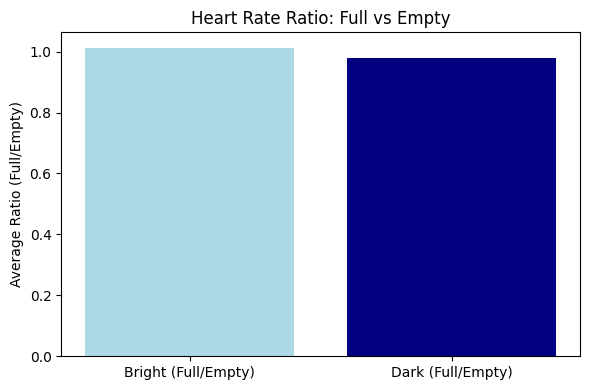

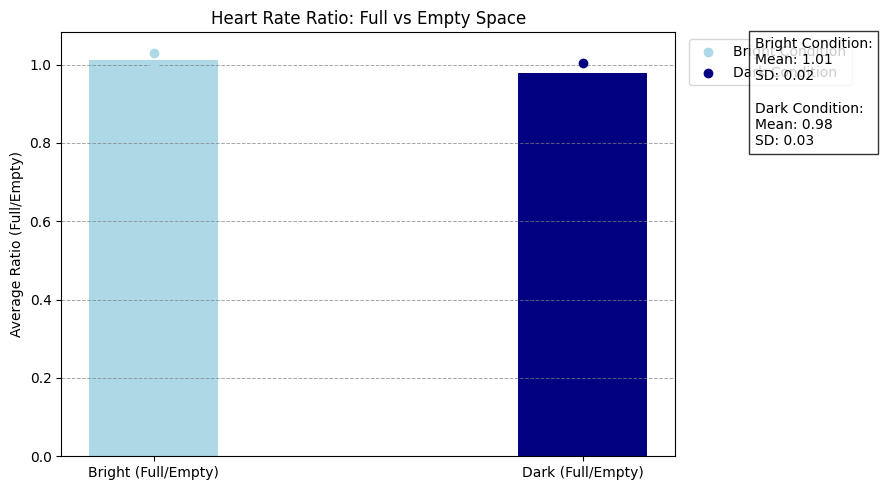


Statistical Summary:
Bright Condition (Full/Empty):
Mean ratio: 1.012
Standard deviation: 0.018

Dark Condition (Full/Empty):
Mean ratio: 0.979
Standard deviation: 0.026


In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Paths to folders
results_folder = '/Users/firefly/Desktop/Team_Messung/data/results'

# Load the results
filename = f"{results_folder}/ecg_results.csv"
results = pd.read_csv(filename)
print("\nLoaded results data:")
print(results)

# Filter rows for each condition
empty_bright = results[results['Condition'] == 'empty_bright']
empty_dark = results[results['Condition'] == 'empty_dark']
full_bright = results[results['Condition'] == 'full_bright']
full_dark = results[results['Condition'] == 'full_dark']

# Extract heart rates for each condition
hr_empty_bright = empty_bright['ECG_Rate_Mean']
hr_empty_dark = empty_dark['ECG_Rate_Mean']
hr_full_bright = full_bright['ECG_Rate_Mean']
hr_full_dark = full_dark['ECG_Rate_Mean']

print("\nHeart rates by condition:")
print("Empty-Bright:", hr_empty_bright.values)
print("Empty-Dark:", hr_empty_dark.values)
print("Full-Bright:", hr_full_bright.values)
print("Full-Dark:", hr_full_dark.values)

# Calculate ratios
# Full/Empty ratio for both lighting conditions
ratio_bright = hr_full_bright.values / hr_empty_bright.values
ratio_dark = hr_full_dark.values / hr_empty_dark.values

# Calculate mean ratios
avg_ratio_bright = ratio_bright.mean()
avg_ratio_dark = ratio_dark.mean()

# Create first bar plot (simple averages)
plt.figure(figsize=(6, 4))
conditions = ['Bright (Full/Empty)', 'Dark (Full/Empty)']
averages = [avg_ratio_bright, avg_ratio_dark]
plt.bar(conditions, averages, color=['lightblue', 'navy'])
plt.ylabel('Average Ratio (Full/Empty)')
plt.title('Heart Rate Ratio: Full vs Empty')
plt.tight_layout()

# Save the simple bar plot
simple_plot_filename = f"{results_folder}/ecg_summary_simple.png"
plt.savefig(simple_plot_filename, bbox_inches='tight', dpi=300)
plt.show()

# Create detailed bar plot with individual data points
fig, ax = plt.subplots(figsize=(8, 5))

# Create bars
bars = ax.bar(conditions, averages, color=['lightblue', 'navy'], width=0.3)

# Add individual data points
data_points_bright = [ratio for ratio in ratio_bright]
data_points_dark = [ratio for ratio in ratio_dark]

ax.scatter([0] * len(data_points_bright), data_points_bright, 
           color='lightblue', label='Bright Condition', zorder=5)
ax.scatter([1] * len(data_points_dark), data_points_dark, 
           color='navy', label='Dark Condition', zorder=5)

# Customize plot
ax.set_ylabel('Average Ratio (Full/Empty)')
ax.set_title('Heart Rate Ratio: Full vs Empty Space')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, 
        color='gray', alpha=0.7)

# Add statistical information
plt.figtext(0.95, 0.7, 
            f"Bright Condition:\nMean: {avg_ratio_bright:.2f}\nSD: {np.std(ratio_bright):.2f}\n\n"
            f"Dark Condition:\nMean: {avg_ratio_dark:.2f}\nSD: {np.std(ratio_dark):.2f}",
            bbox=dict(facecolor='white', alpha=0.8))

# Save the detailed plot
plt.tight_layout()
plt.subplots_adjust(right=0.85)
detailed_plot_filename = f"{results_folder}/ecg_summary_detailed.png"
plt.savefig(detailed_plot_filename, bbox_inches='tight', dpi=300)
plt.show()

# Print statistical summary
print("\nStatistical Summary:")
print(f"Bright Condition (Full/Empty):")
print(f"Mean ratio: {avg_ratio_bright:.3f}")
print(f"Standard deviation: {np.std(ratio_bright):.3f}")
print(f"\nDark Condition (Full/Empty):")
print(f"Mean ratio: {avg_ratio_dark:.3f}")
print(f"Standard deviation: {np.std(ratio_dark):.3f}")